## Objetivo

classificar os clientes em inadimplentes e adimplentes!

inadimplente: </br>
0 - pagou </br>
1 - não pagou

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('emp_automovel.csv')
dados.head(10)

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0
5,15750.000000,1286.550000,12.157324,0,2.0,0.496792,0.638649,0.513171,0.117428,1750.0,0
6,18000.000000,3119.400000,4.000000,0,2.0,0.210867,0.170438,0.513171,0.117428,969.0,0
7,15750.000000,3428.100000,8.000000,1,2.0,0.514392,0.540711,0.513171,0.018600,2421.0,0
8,22500.000000,2722.188351,12.157324,0,2.0,0.617446,0.774146,0.513171,0.204400,0.0,0
9,16855.246324,2722.188351,12.157324,0,2.0,0.501213,0.557860,0.513171,0.117428,0.0,0


In [30]:
X = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X,y)


1.0

In [32]:
print(f'Acurária: {model.score(X,y)}')

Acurária: 1.0


In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.15, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y)

In [34]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
print(f'Acurácia de treino: {model.score(X_train, y_train)}')
print(f'Acurácia de validação: {model.score(X_val, y_val)}')

Acurácia de treino: 0.9197154471544715
Acurácia de validação: 0.9071509450396307


## Avaliando o modelo

In [18]:
from sklearn.metrics import confusion_matrix

In [35]:
y_predict = model.predict(X_val)
matrix_conf = confusion_matrix(y_val, y_predict)
print(matrix_conf)

[[10386    93]
 [  973    29]]


In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

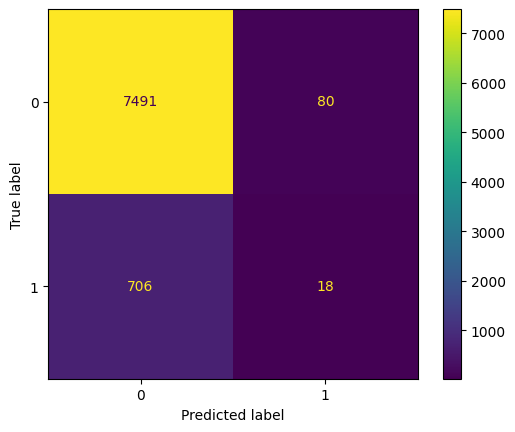

In [21]:
viz = ConfusionMatrixDisplay(confusion_matrix=matrix_conf)
viz.plot();

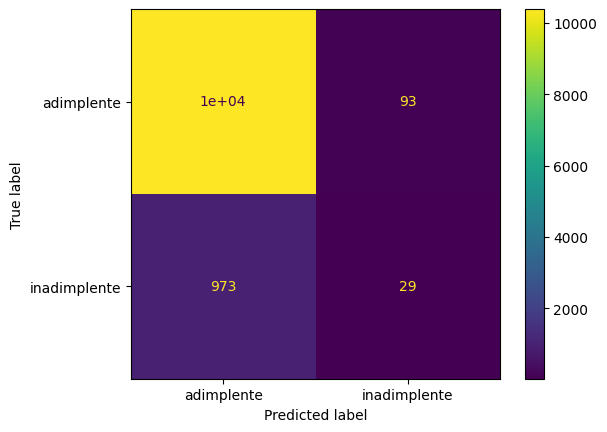

In [36]:
viz = ConfusionMatrixDisplay(confusion_matrix=matrix_conf, display_labels=['adimplente', 'inadimplente'])
viz.plot();

### Utilizando <i>RandomForestClassifier( )</i>

In [23]:
X = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [24]:
from sklearn.ensemble import RandomForestClassifier

SEED = 5
np.random.seed(SEED)

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.15, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y)

model = RandomForestClassifier(max_depth=10)
model.fit(X_train, y_train)
print(f'Acurácia de treino: {model.score(X_train, y_train)}')
print(f'Acurácia de validação: {model.score(X_val, y_val)}')

Acurácia de treino: 0.9146341463414634
Acurácia de validação: 0.9128124727811167


In [25]:
y_predict = model.predict(X_val)
matrix_conf = confusion_matrix(y_val, y_predict)
print(matrix_conf)

[[10479     0]
 [ 1001     1]]


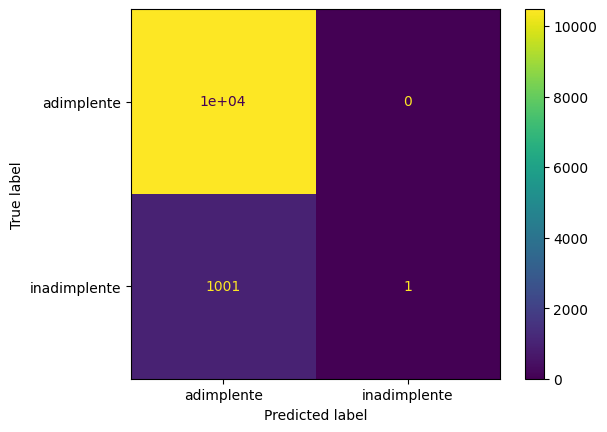

In [26]:
viz = ConfusionMatrixDisplay(confusion_matrix=matrix_conf, display_labels=['adimplente', 'inadimplente'])
viz.plot();

## Validação do modelo

#### Precisão
A primeira métrica que podemos extrair é a precisão, que considera somente os valores previstos pelo modelo que representam a presença da característica.<br>
Precisão [0,1] - quanto mais próximo de 1, melhor.

#### Recall (revocação)
Considera apenas os valores reais em que a característica está presente. Dividimos os verdadeiros positivos pela soma dos falsos negativos mais os verdadeiros positivos.

In [37]:
from sklearn.metrics import accuracy_score

print(f'Acurácia: {accuracy_score(y_val, y_predict)}')

Acurácia: 0.9071509450396307


In [38]:
from sklearn.metrics import precision_score, recall_score

print(f'Precisão: {precision_score(y_val, y_predict)}')
print(f'Recall: {recall_score(y_val, y_predict)}')

Precisão: 0.23770491803278687
Recall: 0.028942115768463075


In [39]:
from sklearn.metrics import f1_score

In [40]:
print(f'F1-Score: {f1_score(y_val, y_predict)}')

F1-Score: 0.05160142348754449


### Curva ROC

In [41]:
from sklearn.metrics import RocCurveDisplay

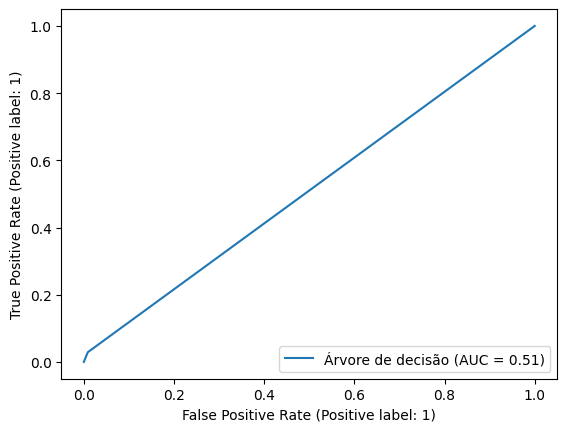

In [42]:
RocCurveDisplay.from_predictions(y_val, y_predict, name = 'Árvore de decisão');

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
print(f'AUC: {roc_auc_score(y_val, y_predict)}')

AUC: 0.5100336115630176


#### Curva de precisão x recall

In [45]:
from sklearn.metrics import PrecisionRecallDisplay

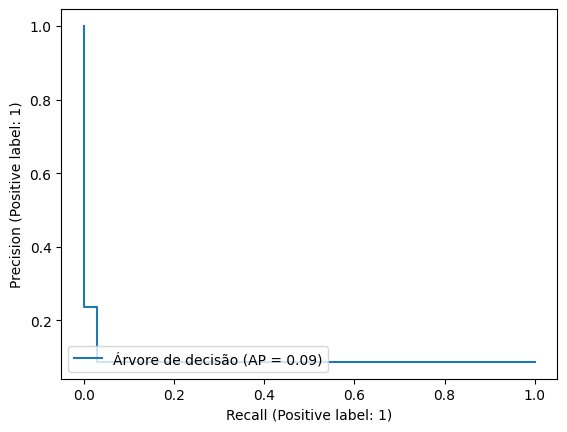

In [46]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name = 'Árvore de decisão');

In [47]:
from sklearn.metrics import average_precision_score

In [48]:
print(f'AP: {average_precision_score(y_val, y_predict)}')

AP: 0.09162839852514276


### Relatório de métricas

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10479
           1       0.24      0.03      0.05      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.50     11481
weighted avg       0.86      0.91      0.87     11481



### Validação cruzada

In [51]:
from sklearn.model_selection import cross_validate, KFold

In [53]:
model = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits = 5, shuffle = True)
cv_results = cross_validate(model, X, y, cv = kf)
cv_results

{'fit_time': array([0.26682472, 0.24617767, 0.2396574 , 0.24534726, 0.24012756]),
 'score_time': array([0.00395489, 0.00295925, 0.00199795, 0.0020287 , 0.00302362]),
 'test_score': array([0.90136091, 0.90429007, 0.90777439, 0.91245645, 0.90799216])}

In [55]:
mean = cv_results['test_score'].mean()
std = cv_results['test_score'].std()

print(f'Intervalo de confiança: [{mean - (2*std)}, {min(mean + (2*std), 1)}]')

Intervalo de confiança: [0.8992783282612872, 0.914271264033376]
